In [1]:
from pathlib import Path
from anndata import read_h5ad

import sys
import scanpy as sc
import os
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.stats import nbinom, pearsonr

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

from tqdm import tqdm

import pickle
import anndata as ad
from scipy.stats import zscore

In [2]:
import sys
sys.path.insert(0, '/scratch/imb/Xiao/STimage')
from stimage._utils import gene_plot

In [3]:
from scipy import stats

def plot_correlation(df, attr_1, attr_2):
    r = stats.pearsonr(df[attr_1], 
                       df[attr_2])[0] **2

    g = sns.lmplot(data=df,
        x=attr_1, y=attr_2,
        height=5, legend=True
    )
    # g.set(ylim=(0, 360), xlim=(0,360))

    g.set_axis_labels(attr_1, attr_2)
    plt.annotate(r'$R^2:{0:.2f}$'.format(r),
                (max(df[attr_1])*0.9, max(df[attr_2])*0.9))
    return g


def calculate_correlation(attr_1, attr_2):
    r = stats.pearsonr(attr_1, 
                       attr_2)[0]
    return r

def calculate_correlation_2(attr_1, attr_2):
    r = stats.spearmanr(attr_1, 
                       attr_2)[0]
    return r

In [4]:
PATH_PRED = Path("/scratch/imb/Xiao/Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_skin_cancer_selected_gene")
PATH_GC = Path("/scratch/imb/uqjxie6/benchmmarking/DeepHis2Exp/data/SkinVisium")
OUT_PATH = PATH_PRED / "PLOT"
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
all_adata = ad.read_h5ad(PATH_GC / "all_adata.h5ad")

In [6]:
samples_to_select = ["Visium29_B1", "Visium29_C1",  "Visium38_B1", "Visium38_D1", "Visium37_D1"]

In [7]:
# open pickle file
with open(PATH_PRED / "top_100gene.pickle", "rb") as f:
    top_100gene = pickle.load(f)

In [8]:
for i in top_100gene:
    print(i)

HSPB1
B2M
PFN1
CALML5
CD74
CD44
S100A10
ANXA2
IFI27
CD63
APOE
ILF3
FLNA
CSTA
RHOA
S100B
MYH9
MYC
CTNNB1
CTSD
KLF4
CD81
LGALS1
MIF
CTSB
HLA-DRA
HMGB1
HLA-E
SNCA
PLA2G4F
HMGA1
TNC
EIF4A2
RXRA
ZFP36L1
S100A8
CD99
TAPBP
GNAS
RBX1
ZFP36L2
BCL2L2
HLA-DMA
S100A9
FGFR3
IQGAP1
RAC1
PRAME
DDX3X
CEBPA
HLA-DPB1
SDC1
HLA-DPA1
CDH1
ERBB3
ITGB1
PPP2CB
S100A7
CTNND1
SPINK5
CCL19
EMP3
CDK4
ANXA5
MCL1
MAP2K2
GTF2I
SOX10
MDM4
EPHB6
TAP1
PTPRC
SERPINB2
IFITM2
IFI16
LAMP1
IL20RB
RORA
IKBKB
AFDN
PTEN
MACF1
LGALS3
HRAS
IRF4
GATA3
GNAI2
C1R
STAT6
TOLLIP
PSMD2
NFE2L2
MARCKSL1
FN1
MAF
HLA-F
KLF5
CXCL14
ARG1
TFDP1


In [9]:
skin_gene_list = [
    "CD63",
    "CD74",
    "LGALS1",
    "SERPINB2",
    "ANXA5",
    "HLA-DRA",
    "PFN1",
    "B2M",
    "CD44",
    "S100A10",
    "CTSB",
    "HLA-DPA1"]

In [10]:
for i, gene in enumerate(top_100gene):
    if gene in skin_gene_list:
        print(i, gene)

1 B2M
2 PFN1
4 CD74
5 CD44
6 S100A10
9 CD63
22 LGALS1
24 CTSB
25 HLA-DRA
52 HLA-DPA1
63 ANXA5
72 SERPINB2


In [11]:
gene_to_plot = ["B2M", "PFN1", "CD74"]

In [13]:
for i in PATH_PRED.glob("./pred*"):
    sample = i.stem.split("pred_")[1]
    if sample in samples_to_select:
        adata = ad.read_h5ad(i)
        adata.X = adata.to_df().apply(zscore)
        for gene in gene_to_plot:
            try:
                gene_plot(adata, genes=gene, image_scale=10, library_id=sample, 
                        output=str(OUT_PATH), name=f"pred_{sample}_{gene}.pdf")
            except:
                continue

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


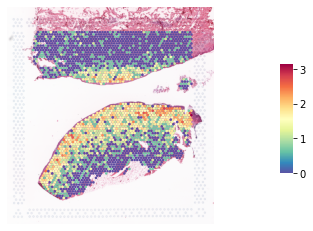

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


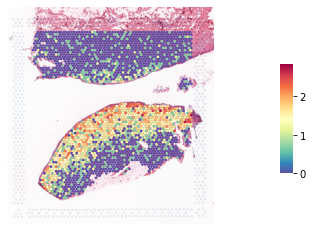

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


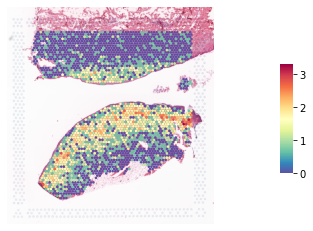

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


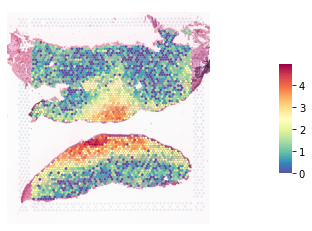

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


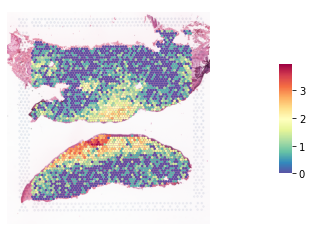

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


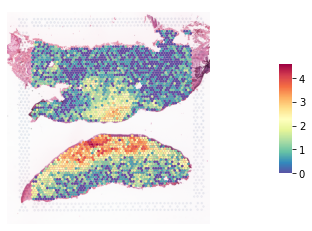

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


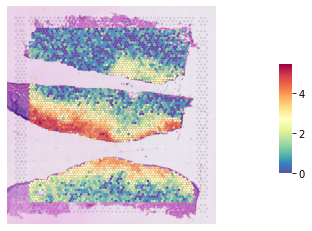

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


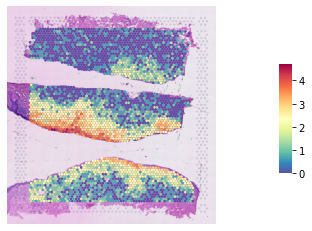

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


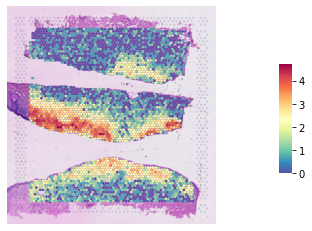

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


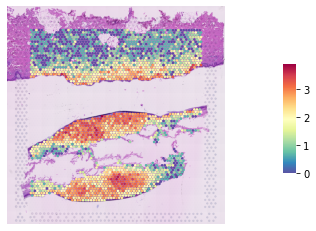

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


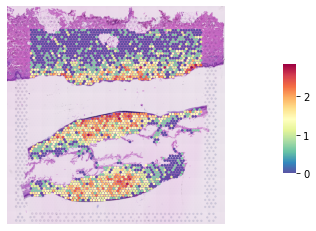

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


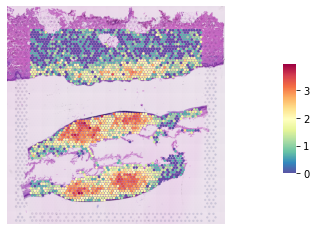

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


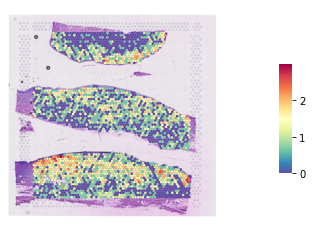

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


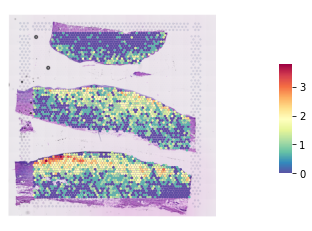

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


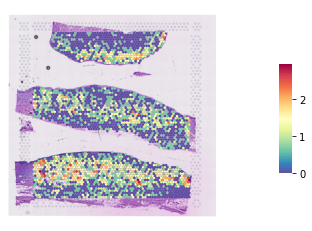

<Figure size 432x288 with 0 Axes>

In [14]:
for sample in samples_to_select:
    adata = all_adata[all_adata.obs["library_id"] == sample]
    # adata.X = adata.to_df().apply(zscore)
    for gene in gene_to_plot:
        try:
            gene_plot(adata, genes=gene, image_scale=10, library_id=sample, 
                     output=str(OUT_PATH), name=f"gc_{sample}_{gene}.pdf")
        except:
            continue